In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Test and train Data

In [3]:
len(X_train), len(X_test)

(60000, 10000)

Data in 2d

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

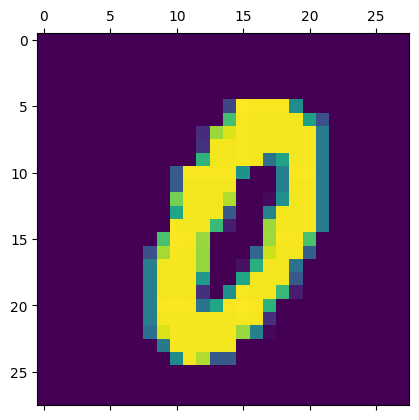

In [8]:

plt.matshow(X_train[34])

In [9]:
y_train[34]

0

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Scaling the value

In [10]:

X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

converted to single Dimension

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Building Model

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8083 - loss: 0.7297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9130 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9200 - loss: 0.2863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9235 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2706


In [25]:

y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.9931034e-01, 2.7280492e-03, 9.9955094e-01, 4.3612751e-01,
       7.1389483e-10, 8.4412080e-01, 9.1559970e-01, 8.8633094e-13,
       1.5332186e-01, 2.3618223e-09], dtype=float32)

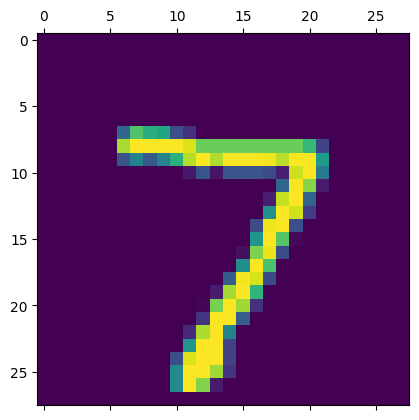

In [24]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7

converting all value to argmax

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Confusion Matrix

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  924,   15,    8,    5,   13,   10,   36,    6],
       [   2,    0,   20,  917,    0,   32,    2,   12,   13,   12],
       [   2,    1,    2,    2,  894,    0,   13,    4,    9,   55],
       [   9,    3,    4,   30,    6,  787,   15,    8,   23,    7],
       [  11,    3,    7,    1,    7,   13,  913,    2,    1,    0],
       [   1,    6,   22,    7,    3,    0,    0,  950,    1,   38],
       [   7,    9,    8,   27,    9,   33,    9,   13,  843,   16],
       [  10,    7,    2,    8,   14,    8,    0,   28,    3,  929]])>

Text(95.72222222222221, 0.5, 'Truth')

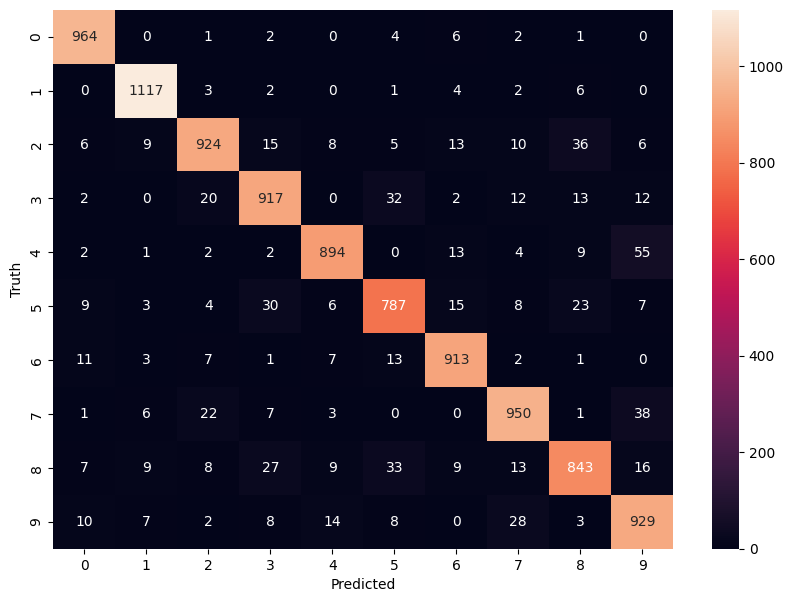

In [22]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy

In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0918


[0.08219783008098602, 0.9743000268936157]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

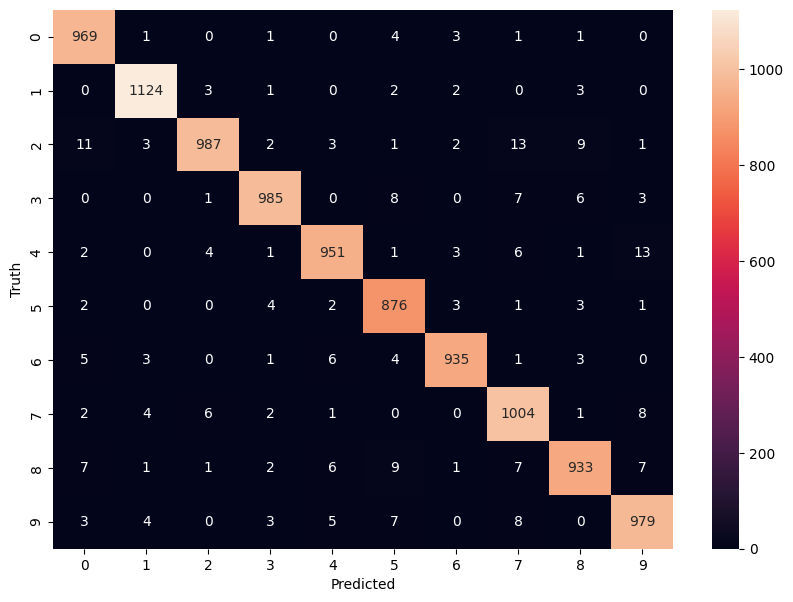

In [25]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8756 - loss: 0.4510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9642 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9757 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9814 - loss: 0.0610
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0468


In [55]:
import numpy as np

class AntColonyTSP:
    def __init__(self, distances, n_ants, n_iterations, alpha, beta, rho, Q):
        """
        Initialize the Ant Colony Optimization solver for TSP.
        
        :param distances: 2D array of distances between cities
        :param n_ants: Number of ants in the colony
        :param n_iterations: Number of iterations to run the algorithm
        :param alpha: Importance of pheromone
        :param beta: Importance of heuristic information (inverse of distance)
        :param rho: Pheromone evaporation rate
        :param Q: Pheromone deposit factor
        """
        self.distances = distances
        self.n_cities = len(distances)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        
        # Initialize pheromone trails
        self.pheromone = np.ones((self.n_cities, self.n_cities))
        self.best_tour = None
        self.best_distance = float('inf')

    def run(self):
        for _ in range(self.n_iterations):
            tours = self.construct_tours()
            self.update_pheromone(tours)
            self.evaporate_pheromone()
            self.update_best_tour(tours)
        
        return self.best_tour, self.best_distance

    def construct_tours(self):
        tours = []
        for _ in range(self.n_ants):
            tour = self.construct_tour()
            tours.append(tour)
        return tours

    def construct_tour(self):
        start_city = np.random.randint(self.n_cities)
        unvisited = set(range(self.n_cities))
        unvisited.remove(start_city)
        tour = [start_city]
        
        while unvisited:
            current_city = tour[-1]
            next_city = self.choose_next_city(current_city, unvisited)
            tour.append(next_city)
            unvisited.remove(next_city)
        
        tour.append(tour[0])  # Return to start
        return tour

    def choose_next_city(self, current_city, unvisited):
        pheromone = self.pheromone[current_city, list(unvisited)]
        distance = self.distances[current_city, list(unvisited)]
        attractiveness = pheromone ** self.alpha * ((1.0 / distance) ** self.beta)
        probabilities = attractiveness / attractiveness.sum()
        
        return np.random.choice(list(unvisited), p=probabilities)

    def update_pheromone(self, tours):
        for tour in tours:
            tour_distance = self.calculate_tour_distance(tour)
            for i in range(len(tour) - 1):
                city1, city2 = tour[i], tour[i+1]
                self.pheromone[city1, city2] += self.Q / tour_distance
                self.pheromone[city2, city1] += self.Q / tour_distance

    def evaporate_pheromone(self):
        self.pheromone *= (1 - self.rho)

    def update_best_tour(self, tours):
        for tour in tours:
            tour_distance = self.calculate_tour_distance(tour)
            if tour_distance < self.best_distance:
                self.best_tour = tour
                self.best_distance = tour_distance

    def calculate_tour_distance(self, tour):
        return sum(self.distances[tour[i], tour[i+1]] for i in range(len(tour) - 1))

# Example usage
if __name__ == "__main__":
    # Example distance matrix (replace with your own data)
    distances = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])

    # Initialize and run the ACO algorithm
    aco = AntColonyTSP(
        distances=distances,
        n_ants=10,
        n_iterations=100,
        alpha=1.0,
        beta=2.0,
        rho=0.1,
        Q=1.0
    )

    best_tour, best_distance = aco.run()
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")

TypeError: 'AntColonyTSP' object is not callable